## Importing necessary libraries

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle as pk

In [363]:
data = pd.read_csv('train.csv')

In [364]:
print(data.shape)
data.head()

(223, 16)


,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1


## Handling Missing Values

In [365]:
(data.isnull().sum()/data.shape[0])*100

GENDER          0.000000
AGE             0.000000
WBC             0.896861
Platelets       0.896861
Neutrophils    26.008969
Lymphocytes    26.008969
Monocytes      26.008969
Eosinophils    26.008969
Basophils      26.457399
CRP             1.793722
AST             0.448430
ALT             3.587444
ALP            52.466368
GGT            49.775785
LDH            29.596413
Class           0.000000
dtype: float64

- Around 50% of the observations are null in the columns ALP and GGT
- So we can drop them

In [366]:
data.drop(['ALP','GGT'],inplace=True,axis=1)

- for each row we are setting a threshold of minimum 6 values out of 14 are required inorder to predict the outcome

In [367]:
data.dropna(thresh=6,axis=0,inplace=True)

## Handling WBC

In [368]:
data[data['WBC'].isnull()]

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
188,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,321.0,1


- we are taking median of WBC of class 1 observations to replace null value

In [369]:
data[data['Class']==1]['WBC'].median()

6.8

In [370]:
data['WBC'].fillna(6.8,inplace=True)

## handling Neutrophils

In [371]:
data['Neutrophils'].unique()

array([ 4. , 10.7, 13.9,  nan,  3.8,  7.6,  5.7,  3.4,  3.3,  2.8,  4.3,
        5.9,  5.2,  3.5,  2.7,  8.9,  5.6,  3.7, 14.1, 12.2,  9. , 10. ,
       16. ,  2.1,  6.5,  9.7,  3.1,  7.9,  4.2, 10.5,  4.8,  1.2,  0.8,
        8. ,  3.6,  2.4, 16.5,  7.1,  2.6,  8.1,  3.2,  4.5, 24.3,  9.6,
        9.5, 12. ,  7.4,  6.7,  0.9,  5.1,  6.2,  2.2,  2.9,  5.3, 15.9,
        6.8,  1.4,  9.2, 13.5, 20.2, 16.1, 14. ,  3.9,  1.9,  2.5,  4.7,
        5.8,  5.4,  6.3,  2. ,  4.1,  1.5,  4.4,  3. ,  0.5, 18.9, 12.9,
       17.6,  8.8, 15.7,  7.3,  9.4,  1.8,  1.1,  5. ,  9.3,  9.1])

In [372]:
data.corr()

,AGE,WBC,Platelets,Neutrophils,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
AGE,1.000000,0.048690,-0.168887,0.078683,0.016221,-0.079684,-0.042996,0.126386,0.013693,-0.093119,0.209956,0.102342
WBC,0.048690,1.000000,0.438809,0.947954,0.567929,0.202245,0.524366,0.292700,0.134747,0.058097,0.342937,-0.167186
Platelets,-0.168887,0.438809,1.000000,0.342153,0.316795,0.219614,0.316627,0.113938,0.031140,0.143753,0.107239,-0.066778
Neutrophils,0.078683,0.947954,0.342153,1.000000,0.430662,0.090837,0.440451,0.392323,0.192125,0.101442,0.334340,-0.103483
Monocytes,0.016221,0.567929,0.316795,0.430662,1.000000,0.264536,0.444978,-0.034554,-0.099062,-0.060665,-0.168622,-0.262518
Eosinophils,-0.079684,0.202245,0.219614,0.090837,0.264536,1.000000,0.423101,-0.078713,-0.044971,-0.032244,-0.131654,-0.228690
Basophils,-0.042996,0.524366,0.316627,0.440451,0.444978,0.423101,1.000000,-0.031367,0.055703,0.057552,0.005043,-0.150111
CRP,0.126386,0.292700,0.113938,0.392323,-0.034554,-0.078713,-0.031367,1.000000,0.248465,0.064313,0.470108,0.233632
AST,0.013693,0.134747,0.031140,0.192125,-0.099062,-0.044971,0.055703,0.248465,1.000000,0.714150,0.618139,0.292650
ALT,-0.093119,0.058097,0.143753,0.101442,-0.060665,-0.032244,0.057552,0.064313,0.714150,1.000000,0.304780,0.244920


Text(0.5, 1.0, 'Correlation between WBC and Neutrophils')

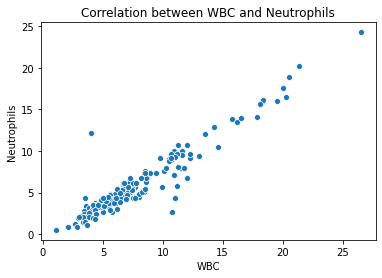

In [373]:
sns.scatterplot(x='WBC',y='Neutrophils',data=data)
plt.title('Correlation between WBC and Neutrophils')

- We can clearly see that the Neutrophils is higly correlated (0.94) with the WBC column
- we are building a linear regression model inorder to predict the missing neutrophils values corresponding with WBC Values

In [374]:
Xt=data[data['Neutrophils'].notnull()][['WBC']]
Yt =data[data['Neutrophils'].notnull()][['Neutrophils']]
from sklearn.linear_model import LinearRegression

In [375]:
lr=LinearRegression()
lr.fit(Xt,Yt)
yp= lr.predict(pd.DataFrame(data['WBC']))
data['Y_pred']=yp
data['Neutrophils'].fillna(data['Y_pred'], inplace = True)
data.drop('Y_pred',axis=1,inplace=True)

## Handling Lymphocytes

In [376]:
data['Lymphocytes'].unique()

array(['0.7', '0.5', '1', nan, '1.7', '0.3', '0.8', '0.2', '1.1', '3.3',
       '0.6', '2.4', '1.5', '0.9', '2.1', '0.4', '1.4', '1.3', '2.3',
       '3.1', '1.2', '7.2', '2.2', '1.6', '2.9', '1.8', '2.7', '1.9', '2',
       '2.5', '4.1', '0-4', '3'], dtype=object)

- We need to replace the '0-4' (assuming it as a typing mistake) value since it cannot be converted to numeric value

In [377]:
data['Lymphocytes'] = data['Lymphocytes'].replace(['0-4'], '0.4')

In [378]:
data['Lymphocytes'].dtype

dtype('O')

Converting into Numeric type

In [379]:
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'] , errors = 'coerce')

- Performing class based replacement of null values
- taking mean of Lymphocytes for each class and replacing correspondingly

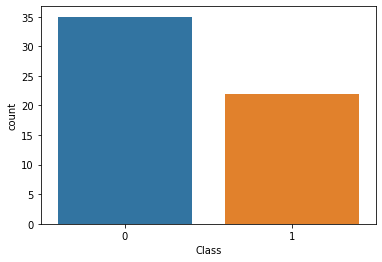

In [380]:
sns.countplot(data[data['Lymphocytes'].isnull()]['Class'])

In [381]:
c0_mean = data[data['Class']==0]['Lymphocytes'].mean()
c1_mean = data[data['Class']==1]['Lymphocytes'].mean()

In [382]:
for ind in data.index:
    if str(data.loc[ind,'Lymphocytes']).lower() == 'nan':
        if data.loc[ind, 'Class'] == 1:
            data.loc[ind,'Lymphocytes'] = c1_mean
        else:
            data.loc[ind,'Lymphocytes'] = c0_mean
            
# data.Lymphocytes.unique()

## Handling Monocytes, Eosinophils, Basophils

In [383]:
data['Monocytes']=data['Monocytes'].replace(np.nan,data['Monocytes'].median())

In [384]:
data['Eosinophils']=data['Eosinophils'].replace(np.nan,data['Eosinophils'].mode()[0])

In [385]:
data['Basophils']=data['Basophils'].replace(np.nan,data['Basophils'].mode()[0])

## Handling CRP, ALT

In [386]:
data[data['CRP'].isnull()]

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
5,M,80,10.1,325.0,7.6,1.7,0.6,0.2,0.0,NaN,19.0,23.0,NaN,0
132,M,84,7.8,167.0,6.2,0.9,0.7,0.0,0.0,NaN,33.0,29.0,NaN,1
160,M,77,3.0,162.0,2.0,0.4,0.4,0.1,0.0,NaN,21.0,10.0,220.0,1


- The missing CRP Values are of 3 people who are older than 77 years 
- So, we are replacing the values with mean of CRP values of people with age greater than 77 years

In [387]:
data[data['AGE']>77].mean()['CRP']

<ipython-input-387-e169cc595034>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['AGE']>77].mean()['CRP']


83.14090909090909

In [388]:
data['CRP'].fillna(84,inplace=True)

- Replacing the ALT null value with its median 

In [389]:
data['ALT']=data['ALT'].replace(np.nan,data['ALT'].median())

## handling Platelets

- Replacing the ALT null value with its mean of class 1 (There is only one missing value which is of class 1)

In [390]:
data[data['Platelets'].isnull()]

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
188,M,37,6.8,NaN,5.112031,1.074167,0.5,0.0,0.0,108.8,27.0,39.0,321.0,1


In [391]:
data[data['Class']==1]['Platelets'].mean()

220.72624113475177

In [392]:
data['Platelets'].fillna(220,inplace=True)

## Handling LDH

In [393]:
data['LDH'] = data['LDH'].fillna(data['LDH'].median())

In [394]:
data.isnull().sum()

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
LDH            0
Class          0
dtype: int64

## handling Outliers

- Handling outliers by capping method (IQR)
- Replaced outliers with whisker values
- Some of features also replaced with median

In [395]:
data.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,61.472973,8.548198,226.033333,6.658403,1.251644,0.572973,0.039640,0.010811,89.327027,52.247748,44.990991,358.324324,0.63964
std,18.361791,4.744024,106.051326,4.342108,0.750209,0.351196,0.120541,0.035215,91.881900,52.209349,43.933824,162.673070,0.48119
min,0.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,10.000000,98.000000,0.00000
25%,49.000000,5.100000,157.000000,3.700000,0.800000,0.400000,0.000000,0.000000,21.950000,27.000000,22.000000,273.250000,0.00000
50%,64.000000,7.250000,199.000000,5.400000,1.074167,0.500000,0.000000,0.000000,53.450000,36.000000,32.000000,321.000000,1.00000
75%,76.000000,10.775000,272.000000,8.539669,1.566667,0.700000,0.000000,0.000000,129.475000,59.750000,46.750000,390.500000,1.00000
max,98.000000,29.200000,620.000000,24.925994,7.200000,3.200000,1.300000,0.300000,425.000000,550.000000,275.000000,1183.000000,1.00000


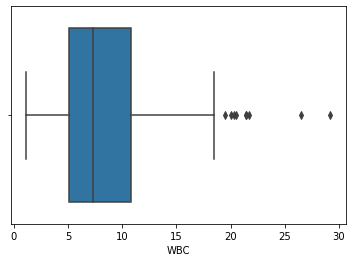

In [396]:
sns.boxplot(data['WBC'])

In [397]:
data['WBC'] = np.where(data['WBC']>17.5, 17, data['WBC'])

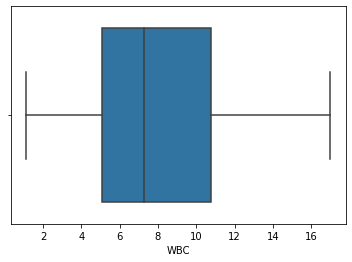

In [398]:
sns.boxplot(data['WBC'])

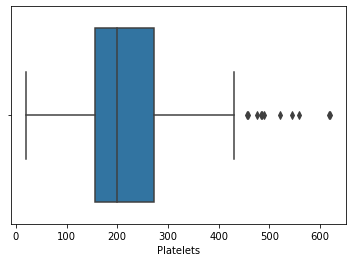

In [399]:
sns.boxplot(data['Platelets'])

In [400]:
data.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,61.472973,8.297297,226.033333,6.658403,1.251644,0.572973,0.039640,0.010811,89.327027,52.247748,44.990991,358.324324,0.63964
std,18.361791,4.075020,106.051326,4.342108,0.750209,0.351196,0.120541,0.035215,91.881900,52.209349,43.933824,162.673070,0.48119
min,0.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,10.000000,98.000000,0.00000
25%,49.000000,5.100000,157.000000,3.700000,0.800000,0.400000,0.000000,0.000000,21.950000,27.000000,22.000000,273.250000,0.00000
50%,64.000000,7.250000,199.000000,5.400000,1.074167,0.500000,0.000000,0.000000,53.450000,36.000000,32.000000,321.000000,1.00000
75%,76.000000,10.775000,272.000000,8.539669,1.566667,0.700000,0.000000,0.000000,129.475000,59.750000,46.750000,390.500000,1.00000
max,98.000000,17.000000,620.000000,24.925994,7.200000,3.200000,1.300000,0.300000,425.000000,550.000000,275.000000,1183.000000,1.00000


In [401]:
iqr = 272 - 157 
lb = 157 - iqr*1.5
ub = 272 + iqr*1.5

In [402]:
for ind in data.index:
    if data.loc[ind, 'Platelets'] < lb:
        data.loc[ind, 'Platelets'] = lb
    elif data.loc[ind, 'Platelets'] > ub:
        data.loc[ind, 'Platelets'] = ub

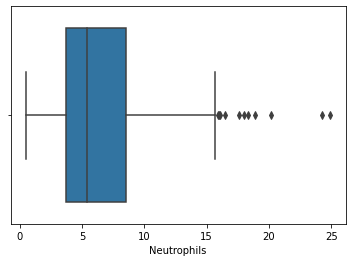

In [403]:
sns.boxplot(data['Neutrophils'])

In [404]:
data['Neutrophils'] = np.where(data['Neutrophils']>15, 15, data['Neutrophils'])

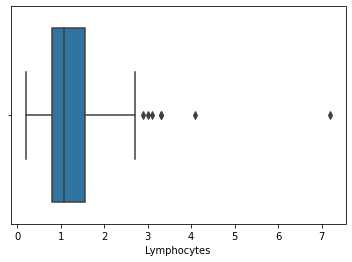

In [405]:
sns.boxplot(data['Lymphocytes'])

In [406]:
data['Lymphocytes'] = np.where(data['Lymphocytes']>2.9, 2.9, data['Lymphocytes'] )

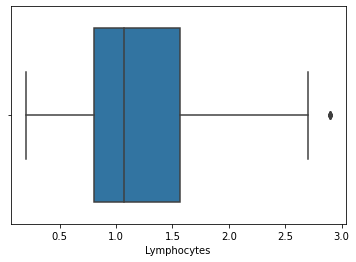

In [407]:
sns.boxplot(data['Lymphocytes'])

In [408]:
data.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,Class
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,61.472973,8.297297,222.337387,6.463853,1.221914,0.572973,0.039640,0.010811,89.327027,52.247748,44.990991,358.324324,0.63964
std,18.361791,4.075020,95.788659,3.791923,0.609604,0.351196,0.120541,0.035215,91.881900,52.209349,43.933824,162.673070,0.48119
min,0.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,10.000000,98.000000,0.00000
25%,49.000000,5.100000,157.000000,3.700000,0.800000,0.400000,0.000000,0.000000,21.950000,27.000000,22.000000,273.250000,0.00000
50%,64.000000,7.250000,199.000000,5.400000,1.074167,0.500000,0.000000,0.000000,53.450000,36.000000,32.000000,321.000000,1.00000
75%,76.000000,10.775000,272.000000,8.539669,1.566667,0.700000,0.000000,0.000000,129.475000,59.750000,46.750000,390.500000,1.00000
max,98.000000,17.000000,444.500000,15.000000,2.900000,3.200000,1.300000,0.300000,425.000000,550.000000,275.000000,1183.000000,1.00000


### Encoding GENDER Column with Male as 1 and Female as 0

In [409]:
data['GENDER']=data['GENDER'].map({'M':1,'F':0})

- Splitting X and Y data

In [410]:
X=data.drop('Class',axis=1)
y=data['Class']

In [411]:
data.to_csv('data_cleaned_final.csv')

## Scaling the Data

In [412]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=data.drop('Class',axis=1)
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=data['Class']

In [413]:
X_scaled.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH
0,-1.443376,0.465439,-0.835573,-0.809200,-0.651232,-0.858088,-0.779023,-0.32959,-0.307692,-0.015566,0.302395,-0.091046,1.525977
1,0.692820,-0.025817,0.738521,-0.589472,1.119675,-1.186912,-1.349793,-0.32959,-0.307692,0.926896,1.262242,1.140853,2.770538
2,-1.443376,0.465439,1.845306,-0.212795,1.965481,-0.364853,0.647901,-0.32959,-0.307692,-0.496615,-0.619058,-0.433240,-0.759825
3,0.692820,1.284199,0.566355,0.048786,0.531133,0.566813,-0.208254,-0.32959,-0.307692,-0.905670,-0.407892,-0.661370,-0.229962
4,-1.443376,1.502535,-0.933953,-0.547619,-0.704095,-1.186912,-1.064408,-0.32959,-0.307692,0.482935,0.091229,-0.638557,1.649201


## Over Sampling the data

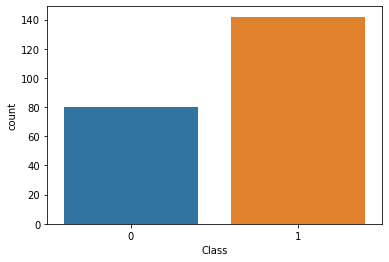

In [414]:
sns.countplot(data['Class'])

- The data is imbalanced we are performing Oversampling inorder to prevent bias

In [415]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X_scaled,y)

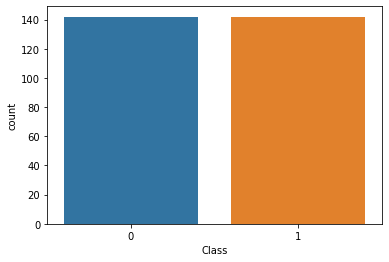

In [416]:
sns.countplot(y_ros)

# Validating func


In [417]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [527]:
def validate(model,xd,yd):
    yp = model.predict(xd)
    print("Results on Train set :",accuracy_score(yd,yp))
    print("MCC SCORE : ",matthews_corrcoef(yd,yp))
    print("Accuracy :", accuracy_score(yd,yp))
    print("Precision :",precision_score(yd,yp))   
    print("Recall :",recall_score(yd,yp))
    scores = cross_val_score(model, xd, yd, scoring='accuracy', cv=cv, n_jobs=-1)
    print("Cross validation scores :",scores)
    print("Mean Score : ",scores.mean())

## Logistic Regression

In [419]:
from sklearn.linear_model import LogisticRegression

In [420]:
logreg = LogisticRegression()

In [421]:
logreg.fit(X_ros,y_ros)

LogisticRegression()

In [422]:
validate(logreg,X_ros,y_ros)

Results on Train set : 0.8133802816901409
MCC SCORE :  0.6275234912262374
Accuracy : 0.8133802816901409
Precision : 0.8296296296296296
Recall : 0.7887323943661971
Cross validation scores : [0.82758621 0.72413793 0.75862069 0.75862069 0.78571429 0.82142857
 0.78571429 0.78571429 0.75       0.89285714]
Mean Score :  0.7890394088669951


## Decision Tree 

In [529]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features='auto', max_depth = 7, criterion = "entropy")
dt.fit(X_ros, y_ros)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto')

In [530]:
validate(dt,X_ros, y_ros)

Results on Train set : 0.971830985915493
MCC SCORE :  0.9445054896779567
Accuracy : 0.971830985915493
Precision : 0.9926470588235294
Recall : 0.9507042253521126
Cross validation scores : [0.89655172 0.82758621 0.93103448 0.82758621 0.89285714 0.92857143
 0.82142857 0.89285714 0.92857143 0.75      ]
Mean Score :  0.869704433497537


## SVM

In [485]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_scaled, y)

SVC()

In [528]:
validate(svm,X_scaled, y)

Results on Train set : 0.8468468468468469
MCC SCORE :  0.6624859374891606
Accuracy : 0.8468468468468469
Precision : 0.86
Recall : 0.9084507042253521
Cross validation scores : [0.73913043 0.86956522 0.77272727 0.72727273 0.68181818 0.72727273
 0.77272727 0.68181818 0.81818182 0.72727273]
Mean Score :  0.7517786561264823


## Random forest Classifier

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [316]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1, 2, 3, 4, 5, 7, 9, 11]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [157]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_scaled,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Sathish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sathish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sathish\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Sathish\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Sathish\anaconda3\lib\site-

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9, 11],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
               

In [158]:
best_random_grid=rf_randomcv.best_estimator_

In [360]:
validate(best_random_grid,X_scaled,y)

Results on Train set : 0.990990990990991
MCC SCORE :  0.9805398173115324
Accuracy : 0.990990990990991
Precision : 0.9861111111111112
Recall : 1.0
Cross validation scores : [0.86666667 0.91111111 0.79545455 0.86363636 0.90909091]
Mean Score :  0.8691919191919192


# Hybrid Model

In [428]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [429]:
estimators = []
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model13 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model13))
model14 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model14))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))

model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model18))
model19 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model19))
model20 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model20))

model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))

model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model27))
model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn3', model28))
model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn5', model30))

model31 = GaussianNB()
estimators.append(('nbs1', model31))
model32 = GaussianNB()
estimators.append(('nbs2', model32))
model33 = GaussianNB()
estimators.append(('nbs3', model33))
model34 = GaussianNB()
estimators.append(('nbs4', model34))
model35 = GaussianNB()
estimators.append(('nbs5', model35))

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)
ensemble.fit(X_scaled, y)

VotingClassifier(estimators=[('logistic1', LogisticRegression(random_state=0)),
                             ('logistic2', LogisticRegression(random_state=0)),
                             ('logistic3', LogisticRegression(random_state=0)),
                             ('logistic4', LogisticRegression(random_state=0)),
                             ('logistic5', LogisticRegression(random_state=0)),
                             ('cart1', DecisionTreeClassifier(max_depth=3)),
                             ('cart2', DecisionTreeClassifie...
                             ('svm2', SVC(kernel='poly')), ('svm3', SVC()),
                             ('svm4', SVC()), ('svm5', SVC(kernel='linear')),
                             ('knn1', KNeighborsClassifier()),
                             ('knn2', KNeighborsClassifier()),
                             ('knn3', KNeighborsClassifier(n_neighbors=6)),
                             ('knn4', KNeighborsClassifier(n_neighbors=4, p=1)),
                      

In [430]:
validate(ensemble,X_scaled,y)

Results on Train set : 0.8513513513513513
MCC SCORE :  0.6767029735504548
Accuracy : 0.8513513513513513
Precision : 0.8811188811188811
Recall : 0.8873239436619719
Cross validation scores : [0.7826087  0.7826087  0.90909091 0.86363636 0.72727273 0.68181818
 0.77272727 0.72727273 0.86363636 0.81818182]
Mean Score :  0.7928853754940711


## Recursive Feature Elimination

In [431]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=4,
    step=5,
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
)

selector = rfecv.fit(X,y)
cols = data.drop('Class', axis=1).columns
isOk = selector.support_
selected_cols = []
for i in range(len(cols)):
    if isOk[i]:
        selected_cols.append(cols[i])
        
print("Selected Columns : \n",selected_cols)

Selected Columns : 
 ['AGE', 'WBC', 'Lymphocytes', 'Monocytes', 'CRP', 'AST', 'ALT', 'LDH']


In [432]:
from sklearn.model_selection import train_test_split

In [433]:
x_train, x_test, y_train, y_test = train_test_split(data[selected_cols],data['Class'], random_state = 42)

In [434]:
svm_model = svm.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Accuracy :  0.625
Recall :  0.7647058823529411
Confusion Matrix : 
 [[ 9 13]
 [ 8 26]]


In [489]:
import pickle

In [490]:
# saving Logistic Regression Model
pickle.dump(
    logreg,
    open("models/logreg.pkl", "wb")
)

# saving decision tree model
pickle.dump(
    dt,
    open("models/dt.pkl", "wb")
)

# saving SVM Model
pickle.dump(
    svm,
    open("models/SVM1.pkl", "wb")
)

# # saving RFE model
pickle.dump(
    best_random_grid,
    open("./Application/models/rfe.pkl", "wb")
)

#Saving Ensemble
pickle.dump(
    ensemble,
    open("models/ensemble.pkl", "wb")
)


# saving the scaler
pickle.dump(
    scaler,
    open("models/standard_scaler.pkl", "wb")
)


### TESTING

In [491]:
test = pd.read_csv('test.csv')

In [492]:
test.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,M,66,5.5,177,NaN,NaN,NaN,NaN,NaN,57.2,15.0,12.0,NaN,NaN,NaN,1
1,M,76,23.3,346,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,1
2,F,72,4.3,227,3.9,1.1,0.7,0.0,0.0,91.2,77.0,30.0,49.0,49.0,428.0,1
3,M,81,4.2,150,3.6,0.5,0.1,0.0,0.0,67.3,42.0,29.0,NaN,NaN,NaN,1
4,F,36,13.5,184,9.5,2.6,1.4,0.1,0.0,1.3,17.0,11.0,NaN,NaN,NaN,0


In [493]:
test.isnull().sum()

GENDER          0
AGE             0
WBC             0
Platelets       0
Neutrophils    12
Lymphocytes    12
Monocytes      12
Eosinophils    12
Basophils      12
CRP             2
AST             1
ALT             5
ALP            31
GGT            32
LDH            19
SWAB            0
dtype: int64

In [494]:
test.drop(['ALP','GGT'],inplace=True,axis=1)

#### For testing, we are using all the training data to fit our model and then we will evaluate the model performance with test data

## Handling Neutrophils

In [495]:
test['Np_pred'] = lr.predict(test[['WBC']])

In [496]:
test['Neutrophils'].fillna(test['Np_pred'], inplace = True)
test.drop('Np_pred', axis = 1, inplace = True)

## Handling Lymphocytes

In [497]:
c0_mean = data[data['Class']==0]['Lymphocytes'].mean()

In [498]:
c1_mean = data[data['Class']==1]['Lymphocytes'].mean()

In [499]:


for ind in test.index:
    if str(test.loc[ind,'Lymphocytes']).lower() == 'nan':
        if test.loc[ind, 'SWAB'] == 1:
            test.loc[ind,'Lymphocytes'] = c1_mean
        else:
            test.loc[ind,'Lymphocytes'] = c0_mean
            


## Handling Monocytes

In [500]:
test['Monocytes']=test['Monocytes'].replace(np.nan,data['Monocytes'].median())

## Handling Eosinophils

In [501]:
test['Eosinophils']=test['Eosinophils'].replace(np.nan,data['Eosinophils'].mode()[0])

## Handling Basophils

In [502]:
test['Basophils']=test['Basophils'].replace(np.nan,data['Basophils'].mode()[0])

## Handling CRP

In [503]:
mean = data[data['AGE']>77].mean()['CRP']

In [504]:
test['CRP'].fillna(mean,inplace=True)

## Handling AST, ALT

In [505]:
median = data['AST'].median()
test['AST'].fillna(median, inplace = True)

In [506]:
test['ALT']=test['ALT'].replace(np.nan,data['ALT'].median())

## Handling LDH

In [507]:
test['LDH'] = test['LDH'].fillna(data['LDH'].median())

## Handling Outliers in test

In [508]:
test['WBC'] = np.where(test['WBC']>17.5, 17, test['WBC'])

In [509]:
iqr = 272 - 157 
lb = 157 - iqr*1.5
ub = 272 + iqr*1.5
for ind in test.index:
    if test.loc[ind, 'Platelets'] < lb:
        test.loc[ind, 'Platelets'] = lb
    elif test.loc[ind, 'Platelets'] > ub:
        test.loc[ind, 'Platelets'] = ub

In [510]:
test['Neutrophils'] = np.where(test['Neutrophils']>15, 15, test['Neutrophils'])

In [511]:
test['Lymphocytes'] = np.where(test['Lymphocytes']>2.9, 2.9, test['Lymphocytes'] )

## Encoding Gender

In [512]:
test['GENDER']=test['GENDER'].map({'M':1,'F':0})

In [513]:
X_test = test.drop('SWAB',axis=1)
y_test = test['SWAB']

In [514]:
scaler = pk.load(open('models/standard_scaler.pkl','rb'))

In [515]:
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [516]:
X_test_scaled.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH
0,0.692820,0.247103,-0.688001,-0.474376,-0.661246,-0.292701,-0.208254,-0.329590,-0.307692,-0.350446,-0.715043,-0.752622,-0.229962
1,0.692820,0.792943,2.140449,1.293912,2.256227,-0.292701,-0.208254,-0.329590,-0.307692,0.393489,0.091229,-0.341989,2.517929
2,-1.443376,0.574607,-0.983144,0.048786,-0.677663,-0.200442,0.362516,-0.329590,-0.307692,0.020431,0.475168,-0.341989,0.429285
3,0.692820,1.065863,-1.007739,-0.756884,-0.756958,-1.186912,-1.349793,-0.329590,-0.307692,-0.240274,-0.196725,-0.364802,-0.229962
4,-1.443376,-1.390417,1.279616,-0.401133,0.802497,2.265734,2.360209,0.501876,-0.307692,-0.960210,-0.676649,-0.775435,-0.229962


In [517]:
LogReg = pk.load(open('models/logreg.pkl','rb'))
Dec_Tree = pk.load(open('models/dt.pkl','rb'))
SVM1 = pk.load(open('models/SVM1.pkl','rb'))
RFE = pk.load(open('models/rfe.pkl','rb')) 
ensemble = pk.load(open('models/ensemble.pkl','rb'))

In [518]:
from sklearn.metrics import matthews_corrcoef
def validate(model,X,y):
    y_pred = model.predict(X)
    print("MCC SCORE : ",matthews_corrcoef(y,y_pred))

In [519]:
validate(LogReg,X_test_scaled,y_test)

MCC SCORE :  0.5868062289779952


In [520]:
validate(Dec_Tree,X_test_scaled,y_test)

MCC SCORE :  0.46415093955852404


In [521]:
X_test_scaled.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH
0,0.692820,0.247103,-0.688001,-0.474376,-0.661246,-0.292701,-0.208254,-0.329590,-0.307692,-0.350446,-0.715043,-0.752622,-0.229962
1,0.692820,0.792943,2.140449,1.293912,2.256227,-0.292701,-0.208254,-0.329590,-0.307692,0.393489,0.091229,-0.341989,2.517929
2,-1.443376,0.574607,-0.983144,0.048786,-0.677663,-0.200442,0.362516,-0.329590,-0.307692,0.020431,0.475168,-0.341989,0.429285
3,0.692820,1.065863,-1.007739,-0.756884,-0.756958,-1.186912,-1.349793,-0.329590,-0.307692,-0.240274,-0.196725,-0.364802,-0.229962
4,-1.443376,-1.390417,1.279616,-0.401133,0.802497,2.265734,2.360209,0.501876,-0.307692,-0.960210,-0.676649,-0.775435,-0.229962


In [522]:
X_ros.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH
0,-1.443376,0.465439,-0.835573,-0.809200,-0.651232,-0.858088,-0.779023,-0.32959,-0.307692,-0.015566,0.302395,-0.091046,1.525977
1,0.692820,-0.025817,0.738521,-0.589472,1.119675,-1.186912,-1.349793,-0.32959,-0.307692,0.926896,1.262242,1.140853,2.770538
2,-1.443376,0.465439,1.845306,-0.212795,1.965481,-0.364853,0.647901,-0.32959,-0.307692,-0.496615,-0.619058,-0.433240,-0.759825
3,0.692820,1.284199,0.566355,0.048786,0.531133,0.566813,-0.208254,-0.32959,-0.307692,-0.905670,-0.407892,-0.661370,-0.229962
4,-1.443376,1.502535,-0.933953,-0.547619,-0.704095,-1.186912,-1.064408,-0.32959,-0.307692,0.482935,0.091229,-0.638557,1.649201


In [523]:
validate(SVM1,X_test_scaled, y_test)

MCC SCORE :  0.6492207662311682


In [524]:
validate(RFE,X_test_scaled,y_test)

MCC SCORE :  0.5042405284182773


In [525]:
validate(ensemble,X_test_scaled,y_test)

MCC SCORE :  0.5969398907915421


In [531]:
import flask
import imblearn
import sklearn

In [533]:
sklearn.__version__

'1.0.2'

In [534]:
import pandas
pandas.__version__

'1.4.1'

In [535]:
flask.__version__

'1.1.2'